In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

my_year_month_fmt = mdates.DateFormatter('%m/%y')

mpl.style.use('ggplot')
df = pd.read_csv(r'c:\Users\ngoho\Box Sync\01 - Power BI - Python Document\38 - Python Work\00.Stock_Data\excel_hpg.csv')
%matplotlib inline
df['datetime']=pd.to_datetime(df['<DTYYYYMMDD>'],format='%Y%m%d')

In [2]:
df.head()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>,datetime
0,HPG,20210223,43.20,43.75,42.95,43.30,17921700,43.20,43.75,42.95,43.30,0,176800,1782600,2021-02-23
1,HPG,20210222,43.45,44.40,43.00,43.40,21362500,43.45,44.40,43.00,43.40,68000,1757900,4282000,2021-02-22
2,HPG,20210219,43.45,43.90,43.10,43.45,17007500,43.45,43.90,43.10,43.45,659024,6179900,1131000,2021-02-19
3,HPG,20210218,43.85,44.00,42.95,43.85,21343800,43.85,44.00,42.95,43.85,274900,474390,73500,2021-02-18
4,HPG,20210217,42.45,43.45,42.30,43.45,24253200,42.45,43.45,42.30,43.45,20000,4743900,735000,2021-02-17


In [3]:
df_price = df[['datetime','<Close>']]
df_price = df_price.set_index('datetime')
df_price = df_price.head(300)
#df_price['<Close>'].plot(kind="line")
#plt.title('TCB Price Trend - Date')

In [4]:
df_price.head()

,<Close>
datetime,
2021-02-23,43.30
2021-02-22,43.40
2021-02-19,43.45
2021-02-18,43.85
2021-02-17,43.45


In [5]:
short_rolling = df_price.rolling(window=20).mean()
short_rolling.head(20)

,<Close>
datetime,
2021-02-23,NaN
2021-02-22,NaN
2021-02-19,NaN
2021-02-18,NaN
2021-02-17,NaN
2021-02-09,NaN
2021-02-08,NaN
2021-02-05,NaN
2021-02-04,NaN


In [14]:
long_rolling = df_price.rolling(window=100).mean()
long_rolling.tail()
ema_short = df_price.ewm(span=20, adjust=False).mean()

Text(0, 0.5, 'Price in VND')

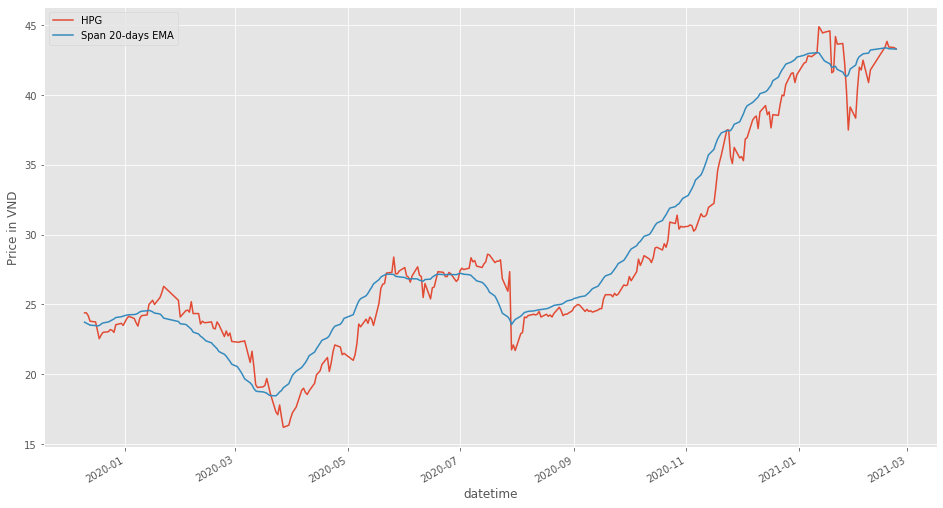

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
df_price['<Close>'].plot(kind="line", label = 'HPG')
#short_rolling['<Close>'].plot(kind="line",label = '20-days SMA')
ema_short['<Close>'].plot(kind="line",label = 'Span 20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in VND')

#long_rolling['<Close>'].plot(kind="line", label = '100-days SMA')
#ax.plot(df_price.loc[start_date:end_date, :].index, df_price.loc[start_date:end_date, '<Close>'], label='Price')
#ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, '<Close>'], label = '100-days SMA')
#ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, '<Close>'], label = '20-days SMA')


In [35]:
df_vol = df[['datetime','<VolumeFB>','<VolumeFS>']]
df_vol = df[['datetime','<VolumeFB>','<VolumeFS>']].head(100)
#df_vol_buy= df_vol_buy.set_index('datetime')

In [36]:
df_vol.head()

,datetime,<VolumeFB>,<VolumeFS>
0,2021-02-23,176800,1782600
1,2021-02-22,1757900,4282000
2,2021-02-19,6179900,1131000
3,2021-02-18,474390,73500
4,2021-02-17,4743900,735000


In [37]:
#fig, ax = plt.subplots(figsize=(15,6))

#sns.catplot(x='datetime',y='<VolumeFB>',data=df_vol_buy,kind='bar',aspect=3)

#df_vol_buy= df_vol_buy.set_index('datetime')
#df_vol_buy.plot(kind='bar',ax=ax, label = "HPG")

In [38]:
df_vol['Week_no']= df_vol['datetime'].dt.week
df_vol['Year_no']= df_vol['datetime'].dt.year
df_vol['Period'] = df_vol['Year_no'].astype(str) + str("-") + df_vol['Week_no'].astype(str)
df_vol = df_vol.groupby(by='Period').sum().reset_index()
#df_vol = df_vol.drop(['Week_no','Year_no'], axis = 1)
df_vol.head()

,Period,<VolumeFB>,<VolumeFS>,Week_no,Year_no
0,2020-40,5138520,13616950,160,8080
1,2020-41,13314600,5775690,205,10100
2,2020-42,12466710,7410820,210,10100
3,2020-43,11048610,9120200,215,10100
4,2020-44,8054560,13843460,220,10100


In [39]:
df_vol = df_vol.drop(['Week_no','Year_no'],axis =1)
df_vol.head()
#sns.catplot(x='period',y='<VolumeFB>',data=df_vol_buy,kind='bar',aspect=3)

,Period,<VolumeFB>,<VolumeFS>
0,2020-40,5138520,13616950
1,2020-41,13314600,5775690
2,2020-42,12466710,7410820
3,2020-43,11048610,9120200
4,2020-44,8054560,13843460


[Text(0, 0, '2020-40'),
 Text(0, 0, '2020-41'),
 Text(0, 0, '2020-42'),
 Text(0, 0, '2020-43'),
 Text(0, 0, '2020-44'),
 Text(0, 0, '2020-45'),
 Text(0, 0, '2020-46'),
 Text(0, 0, '2020-47'),
 Text(0, 0, '2020-48'),
 Text(0, 0, '2020-49'),
 Text(0, 0, '2020-50'),
 Text(0, 0, '2020-51'),
 Text(0, 0, '2020-52'),
 Text(0, 0, '2020-53'),
 Text(0, 0, '2021-1'),
 Text(0, 0, '2021-2'),
 Text(0, 0, '2021-3'),
 Text(0, 0, '2021-4'),
 Text(0, 0, '2021-5'),
 Text(0, 0, '2021-6'),
 Text(0, 0, '2021-7'),
 Text(0, 0, '2021-8')]

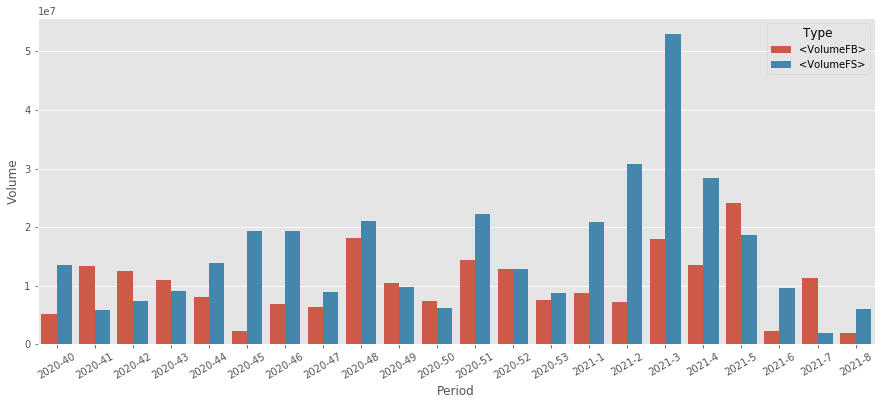

In [44]:
df_vol_unpivot = df_vol.melt(id_vars=['Period'], var_name='Type', value_name='Volume')
df_vol_unpivot.head(10)
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.barplot(x = 'Period', y = 'Volume', hue = 'Type', data = df_vol_unpivot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)